# Sentiment analyst lazada review

Sebuah kata yang kita tulis pastinya memiliki sebuah makna dan emosi yang tersirat, seperti halnya kita menuliskan review pada sebuah produk yang kita beli melalui e-commerce. Review pelanggan terhadap produk yang dijual sangat berguna sekali bagi pelaku bisnis untuk mengevaluasi produk kita agar kedepannya produk-produk yang kita jual dapat lebih baik lagi dan dapat meningkatkan penjualannya. 
cara kita agar bisa memahami review dari pelanggan memiliki makna positif, netral atau negatif di sebut dengan proses sentiment analysis.
### apasih sentimen analisis itu?

menurut 

## Import Library

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.plot import plot_missing_value

## Import Data

In [8]:
df = pd.read_csv("/home/yulius/Portofolio/Sentimen_analyst_Lazada_review/20191002-reviews.csv")
df.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [9]:
df.shape

(203787, 15)

In [10]:
df_review = df[["rating","reviewContent"]]
df_review.head()

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
4,5,NaN


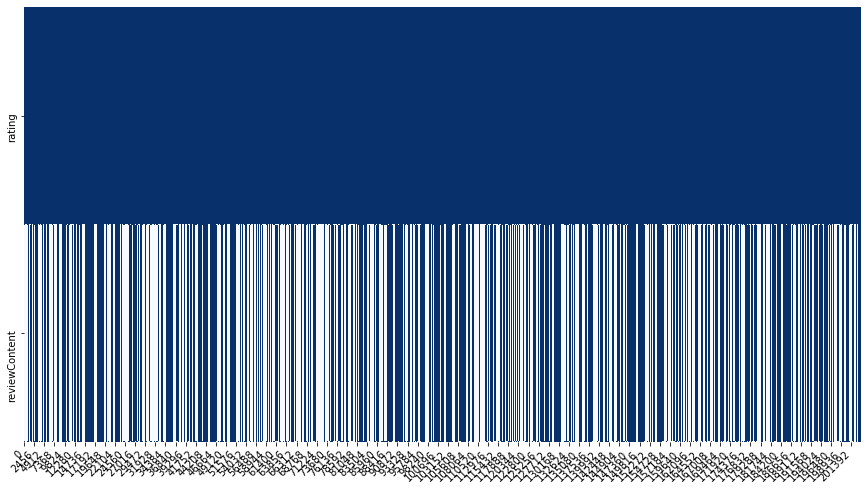

In [11]:
plot_missing_value(df_review)

In [12]:
df_review.dropna(inplace=True)
df_review.reset_index(drop=True,inplace=True)

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_review.shape

(107029, 2)

In [14]:
import nltk
import string
import re

## Make function to text preprocessing

In [15]:
a = "SAYA suka kamu!!!"

### Fungsi normalisasi

In [16]:
def lower(text):
    text = text.lower()
    return text

### menghapus tanda baca

In [17]:
def remove_punctuation(text):
    result = str.maketrans("","", string.punctuation)
    return text.translate(result)

### Remove Stopwords

In [18]:
def remove_stopwords(text):
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    stop_words_id = set(stopwords.words("indonesian"))
    word_tokens = word_tokenize(text)
    removed = []
    for t in word_tokens:
        if t not in stop_words_id:
            removed.append(t)
    removed_text = " ".join(removed)
    return removed_text

### Stemming

In [28]:
def stemming(text):
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stem = []
    for i in text:
        x = stemmer.stem(i)
        stemming.append(x)
    stemming_text = " ".join(stem)
    return stemming_text

### Text Preprocessing

In [35]:
def text_preprocessing(sentence):
    text = lower(sentence)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    return text

In [36]:
clean_text= []

for i in df_review['reviewContent']:
    clean = text_preprocessing(i)
    clean_text.append(clean)

In [34]:
df_review['clean_text'] = pd.Series(clean_text,index=df_review.index)
df_review.head()

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


ValueError: Length of passed values is 0, index implies 107029.

In [22]:
df_review['sentimen'] = df_review['rating']
df_review['sentimen'].replace({5:'Positif',4:'Positif',3:'Netral',2:'Negatif',1:'Negatif'},inplace=True)
df_review.head()

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,rating,reviewContent,clean_text,sentimen
0,5,bagus mantap dah sesui pesanan,bagus mantap dah sesui pesanan,Positif
1,4,"Bagus, sesuai foto",bagus sesuai foto,Positif
2,5,okkkkk mantaaaaaaapppp ... goood,okkkkk mantaaaaaaapppp goood,Positif
3,4,bagus sesuai,bagus sesuai,Positif
4,1,bima,bima,Negatif


## Data Visualization

In [23]:
df_review_pos = df_review[df_review['sentimen']=='Positif']
df_review_net = df_review[df_review['sentimen']=='Netral']
df_review_neg = df_review[df_review['sentimen']=='Negatif']

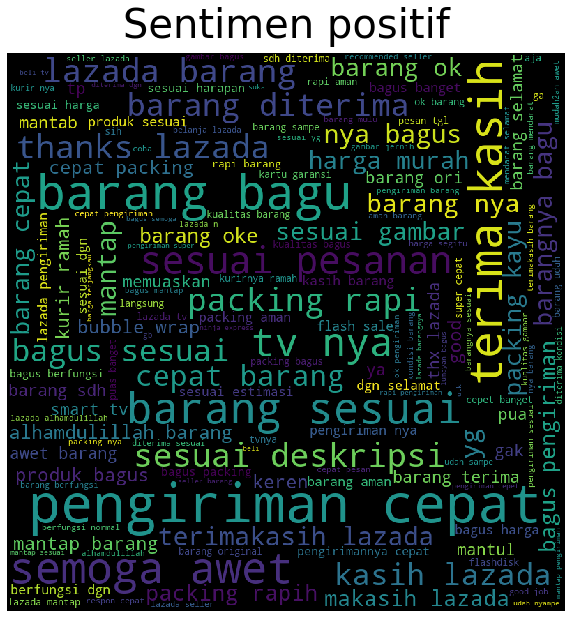

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_to_plot = ' '.join(df_review_pos['clean_text'])
wordcloud = WordCloud(width= 800,height=800,
                     min_font_size=10).generate(word_to_plot)

plt.figure(figsize=(10,20))
plt.title('Sentimen positif',fontsize=40,pad=15)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

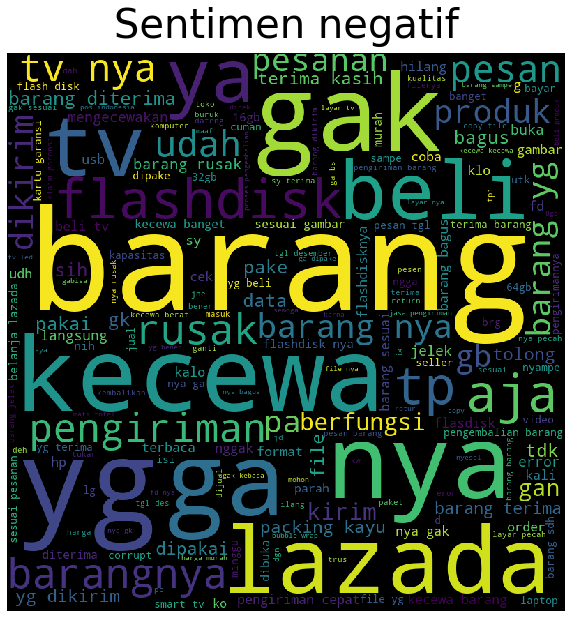

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_to_plot = ' '.join(df_review_neg['clean_text'])
wordcloud = WordCloud(width= 800,height=800,
                     background_color='black',
                     min_font_size=10).generate(word_to_plot)

plt.figure(figsize=(10,20))
plt.title('Sentimen negatif',fontsize=40,pad=15)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Dataset spliting

In [20]:
df_review.sentimen.value_counts()

Positif    93522
Negatif     9135
Netral      4372
Name: sentimen, dtype: int64

### Membuat data berjumlah sama

In [ ]:
from sklearn.utils import resample
positif = resample(df_review_pos, 
                                 replace=True,     
                                 n_samples=5000,    
                                 random_state=123)
negatif = resample(df_review_neg, 
                                 replace=True,     
                                 n_samples=5000,    
                                 random_state=123)
netral = resample(df_review_net, 
                                 replace=True,     
                                 n_samples=4300,    
                                 random_state=123)
df_review = pd.concat([positif,negatif,netral])
df_review.sentimen.value_counts()

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_review['sentimen'] = le.fit_transform(df_review['sentimen'])

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
X = df_review['clean_text']
y = df_review['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85623,), (21406,), (85623,), (21406,))

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer().fit(X_train)
X_test= tfidf.transform(X_test)
X_train = tfidf.transform(X_train)

# Training Model

In [50]:
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix,roc_auc_score

In [51]:
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)

In [52]:
y_pred = tree.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9755208819957022
[[ 1651    16   160]
 [   16   709   149]
 [  119    64 18522]]


## Sanity check

In [43]:
review_1 = ['barang rusak, tidak sesuai dengan pesanan','barang awet, bagus']
review_1 = tfidf.transform(review_1)

In [45]:
hasil = tree.predict(review_1)
hasil

array([0, 2])

# Pipeline version